# average 이용한 calibration

In [2]:
import sys
sys.path.append('../') 

In [3]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tpot = False
trial_name = 'avg/'
dataset = pd.read_csv('../data/avg_images_avg.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP1 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [5]:
SP1.display_dataset()

,R,G,B,Thickness
0,11.6948,10.9112,8.1678,48.266667
1,16.3678,15.7481,17.2156,47.966667
2,10.6743,14.8974,17.9923,48.166667
3,16.4017,16.4446,18.6127,48.600000
4,9.5079,8.0496,12.7035,59.533333


In [6]:
SP1.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 100.23 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
**************************************************


R2       0.876850
RMSE     8.608165
MSE     74.100506
MAE      5.471460
MAPE     5.880850
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 103.77 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.2), ('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 500)])
*****

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
841 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

Time consumed loading/training model :: 56.60 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
**************************************************


R2       0.938324
RMSE     6.091909
MSE     37.111357
MAE      4.631239
MAPE     5.491505
Name: MLPRegressor, dtype: float64


In [7]:
SP1.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.95282,5.32806,28.38824,4.19704,5.03039
MLPRegressor,0.93832,6.09191,37.11136,4.63124,5.49150
GradientBoostingRegressor,0.91896,6.98320,48.76502,4.38700,4.82945
XGBRegressor,0.91444,7.17518,51.48319,4.61904,5.07550
KNeighborsRegressor,0.91343,7.21717,52.08755,5.14274,6.15048
RandomForestRegressor,0.87685,8.60817,74.10051,5.47146,5.88085
CatBoostRegressor,0.87584,8.64333,74.70714,5.33069,5.62275
LGBMRegressor,0.72987,12.74907,162.53881,6.52931,6.51464
DecisionTreeRegressor,0.64592,14.59636,213.05368,11.00384,12.14343


Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.9216633019149442), ('n_estimators', 500)])
Best performance: R2       0.952821
RMSE     5.328061
MSE     28.388236
MAE      4.197036
MAPE     5.030385
Name: AdaBoostRegressor, dtype: float64


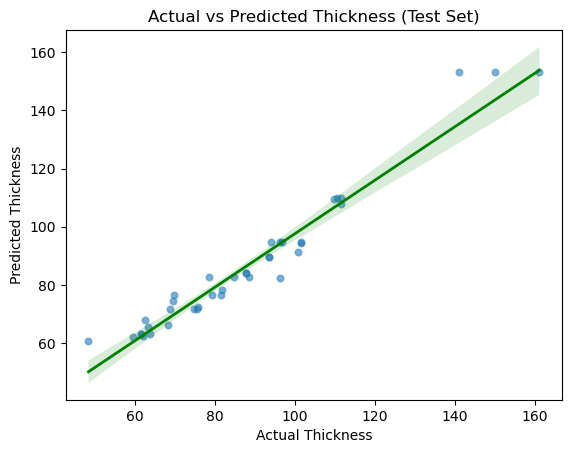

In [8]:
best_model, y_pred, test_pred = SP1.summarize(metric='RMSE')

# 이전에 진행한 방법론 calibration

In [10]:
trial_name = 'ky/'
dataset = pd.read_csv('../data/avg_images_ky.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP2 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [11]:
SP2.display_dataset()

,R,G,B,Thickness
0,11.694800,10.911200,8.167800,48.266667
1,10.786424,11.797264,9.764301,47.966667
2,13.372254,12.260120,8.377510,48.166667
3,9.727850,9.857869,6.836201,48.600000
4,4.889363,2.641330,1.296578,59.533333


In [12]:
SP2.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time consumed loading/training model :: 86.65 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 3), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2       0.902656
RMSE     7.653281
MSE     58.572714
MAE      5.689275
MAPE     6.217862
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\a

Time consumed loading/training model :: 97.83 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.15060235936932742), ('max_depth', 30), ('max_features', 'auto'), ('min_samples_leaf', 5), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2       0.871678
RMSE     8.787083
MSE     77.212833
MAE      5.844526
MAPE     5.752634
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time consumed loading/training model :: 80.30 s
BEST PARAMS >> AdaBoostRegressor: OrderedDict([('learning_rate', 0.4064618916425105), ('n_estimators', 377)])
**************************************************


R2       0.936666
RMSE     6.173251
MSE     38.109032
MAE      4.993207
MAPE     5.491567
Name: AdaBoostRegressor, dtype: float64
Model not found. Training the model >> XGBRegressor
Time consumed loading/training model :: 83.12 s
BEST PARAMS >> XGBRegressor: OrderedDict([('colsa

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Time consumed loading/training model :: 77.43 s
BEST PARAMS >> DecisionTreeRegressor: OrderedDict([('max_depth', 3), ('max_features', 'auto'), ('min_samples_leaf', 5), ('min_samples_split', 2)])
**************************************************


R2       0.837172
RMSE     9.898270
MSE     97.975745
MAE      7.044169
MAPE     7.320163
Name: DecisionTreeRegressor, dtype: float64
Model not found. Training the model >> MLPRegressor
BayesSearchCV failed. Using the grid search >> MLPRegressor
Time consumed loading/training model :: 60.91 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [50], 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
**************************************************


R2       0.891195
RMSE     8.091310
MSE     65.469290
MAE      6.011266
MAPE     7.302207
Name: MLPRegressor, dtype: float64


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
841 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

In [13]:
SP2.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.93667,6.17325,38.10903,4.99321,5.49157
RandomForestRegressor,0.90266,7.65328,58.57271,5.68928,6.21786
MLPRegressor,0.89119,8.09131,65.46929,6.01127,7.30221
LGBMRegressor,0.88317,8.38438,70.29787,5.69836,5.94580
CatBoostRegressor,0.87834,8.55597,73.20466,5.64900,5.80781
GradientBoostingRegressor,0.87168,8.78708,77.21283,5.84453,5.75263
XGBRegressor,0.86963,8.85709,78.44796,5.95358,6.09135
DecisionTreeRegressor,0.83717,9.89827,97.97574,7.04417,7.32016
KNeighborsRegressor,0.77800,11.55778,133.58237,6.10214,5.69759


Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.4064618916425105), ('n_estimators', 377)])
Best performance: R2       0.936666
RMSE     6.173251
MSE     38.109032
MAE      4.993207
MAPE     5.491567
Name: AdaBoostRegressor, dtype: float64


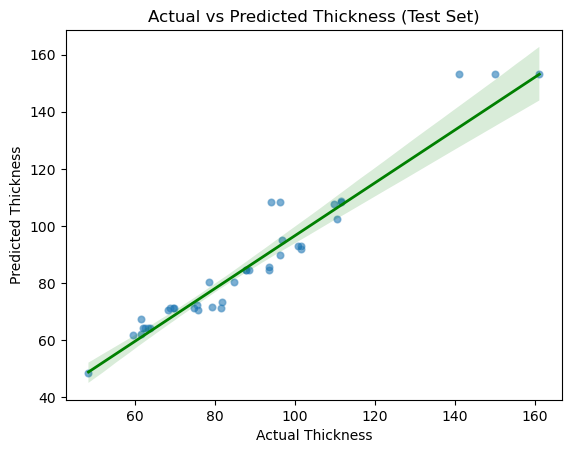

In [14]:
best_model, y_pred, test_pred = SP2.summarize(metric='RMSE')

Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.9216633019149442), ('n_estimators', 500)])
Best performance: R2       0.952821
RMSE     5.328061
MSE     28.388236
MAE      4.197036
MAPE     5.030385
Name: AdaBoostRegressor, dtype: float64


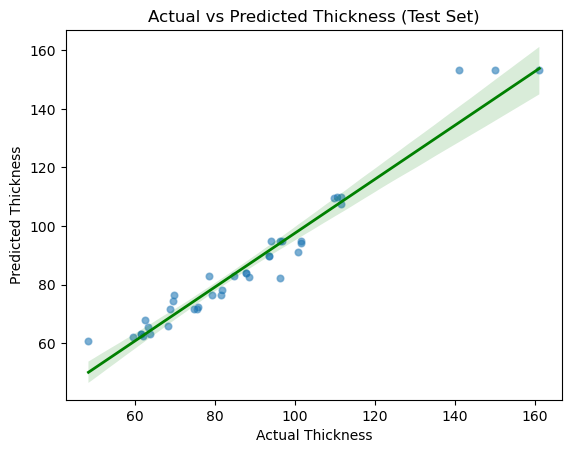

Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.4064618916425105), ('n_estimators', 377)])
Best performance: R2       0.936666
RMSE     6.173251
MSE     38.109032
MAE      4.993207
MAPE     5.491567
Name: AdaBoostRegressor, dtype: float64


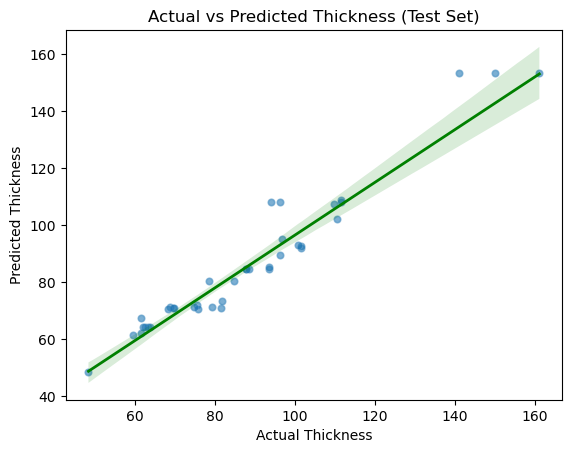

In [15]:
sp1_model, sp1_y_pred, sp1_test_pred = SP1.summarize(metric='RMSE')
sp2_model, sp2_y_pred, sp2_test_pred = SP2.summarize(metric='RMSE')

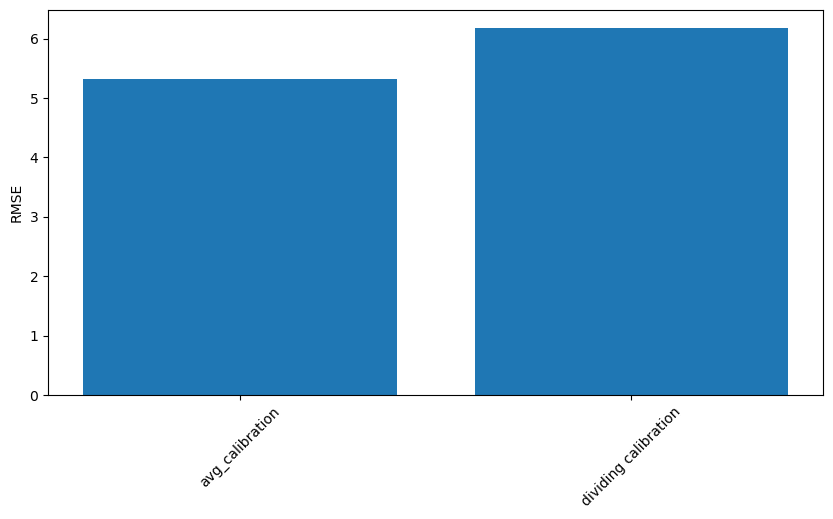

,Methods,RMSE
0,avg_calibration,5.328061
1,dividing calibration,6.173251


In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Compare All Methods

methods = ['avg_calibration','dividing calibration']

y_preds = [sp1_y_pred, sp2_y_pred]

#calculate RMSE
y_test = SP1.y_test

rmse = []
for y_pred in y_preds:
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
#plot
plt.figure(figsize=(10,5))
plt.bar(methods, rmse)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

# Dataframe
RMSE_comparing = pd.DataFrame({'Methods':methods, 'RMSE':rmse})
display(RMSE_comparing.sort_values(by='RMSE'))